# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df.head()



,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:

df.to_csv('..//data/raw/data.csv', index=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
#busco duplicados en el df
duplicados = df.duplicated().sum()

duplicados

0

In [5]:
df.isnull().sum().sort_values(ascending=False)

fips                                0
Total nurse practitioners (2019)    0
STATE_NAME                          0
COUNTY_NAME                         0
Percent of Population Aged 60+      0
                                   ..
POP_ESTIMATE_2018                   0
% Two or more races                 0
Two or more races pop               0
% Hawaiian/PI-alone                 0
Urban_rural_code                    0
Length: 108, dtype: int64

In [6]:
#Elimino columnas que no me sirven de datos categoricos que solo muestran lugares, procentajes de poblacion y no datos medicos

df.drop(["STATE_NAME","COUNTY_NAME" ,"0-9 y/o % of total pop","10-19 y/o % of total pop","20-29 y/o % of total pop","30-39 y/o % of total pop","40-49 y/o % of total pop","50-59 y/o % of total pop","60-69 y/o % of total pop","70-79 y/o % of total pop","80+ y/o % of total pop","% White-alone","% Black-alone","% NA/AI-alone","% Asian-alone","% Hawaiian/PI-alone","% Two or more races","POP_ESTIMATE_2018","N_POP_CHG_2018","GQ_ESTIMATES_2018","R_birth_2018","R_death_2018","R_NATURAL_INC_2018","R_INTERNATIONAL_MIG_2018","R_DOMESTIC_MIG_2018","R_NET_MIG_2018"], axis = 1, inplace = True)
df.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


No se encuentran duplicados ni valores nulos

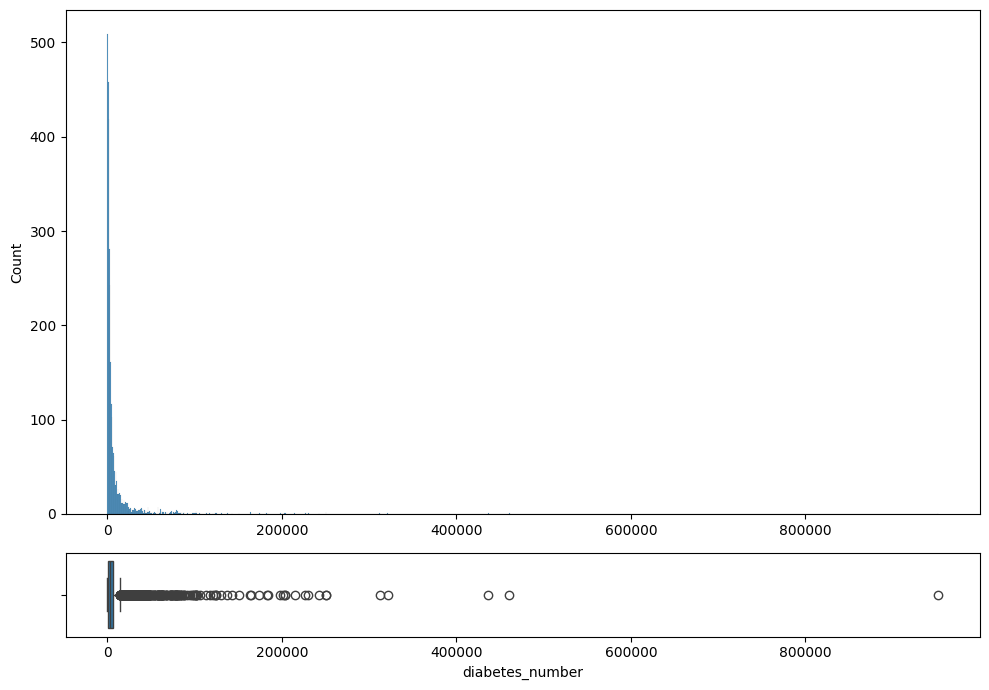

In [7]:
fig, axis = plt.subplots(2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0], data = df, x = "diabetes_number").set(xlabel = None)
sns.boxplot(ax = axis[1], data = df, x = "diabetes_number")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

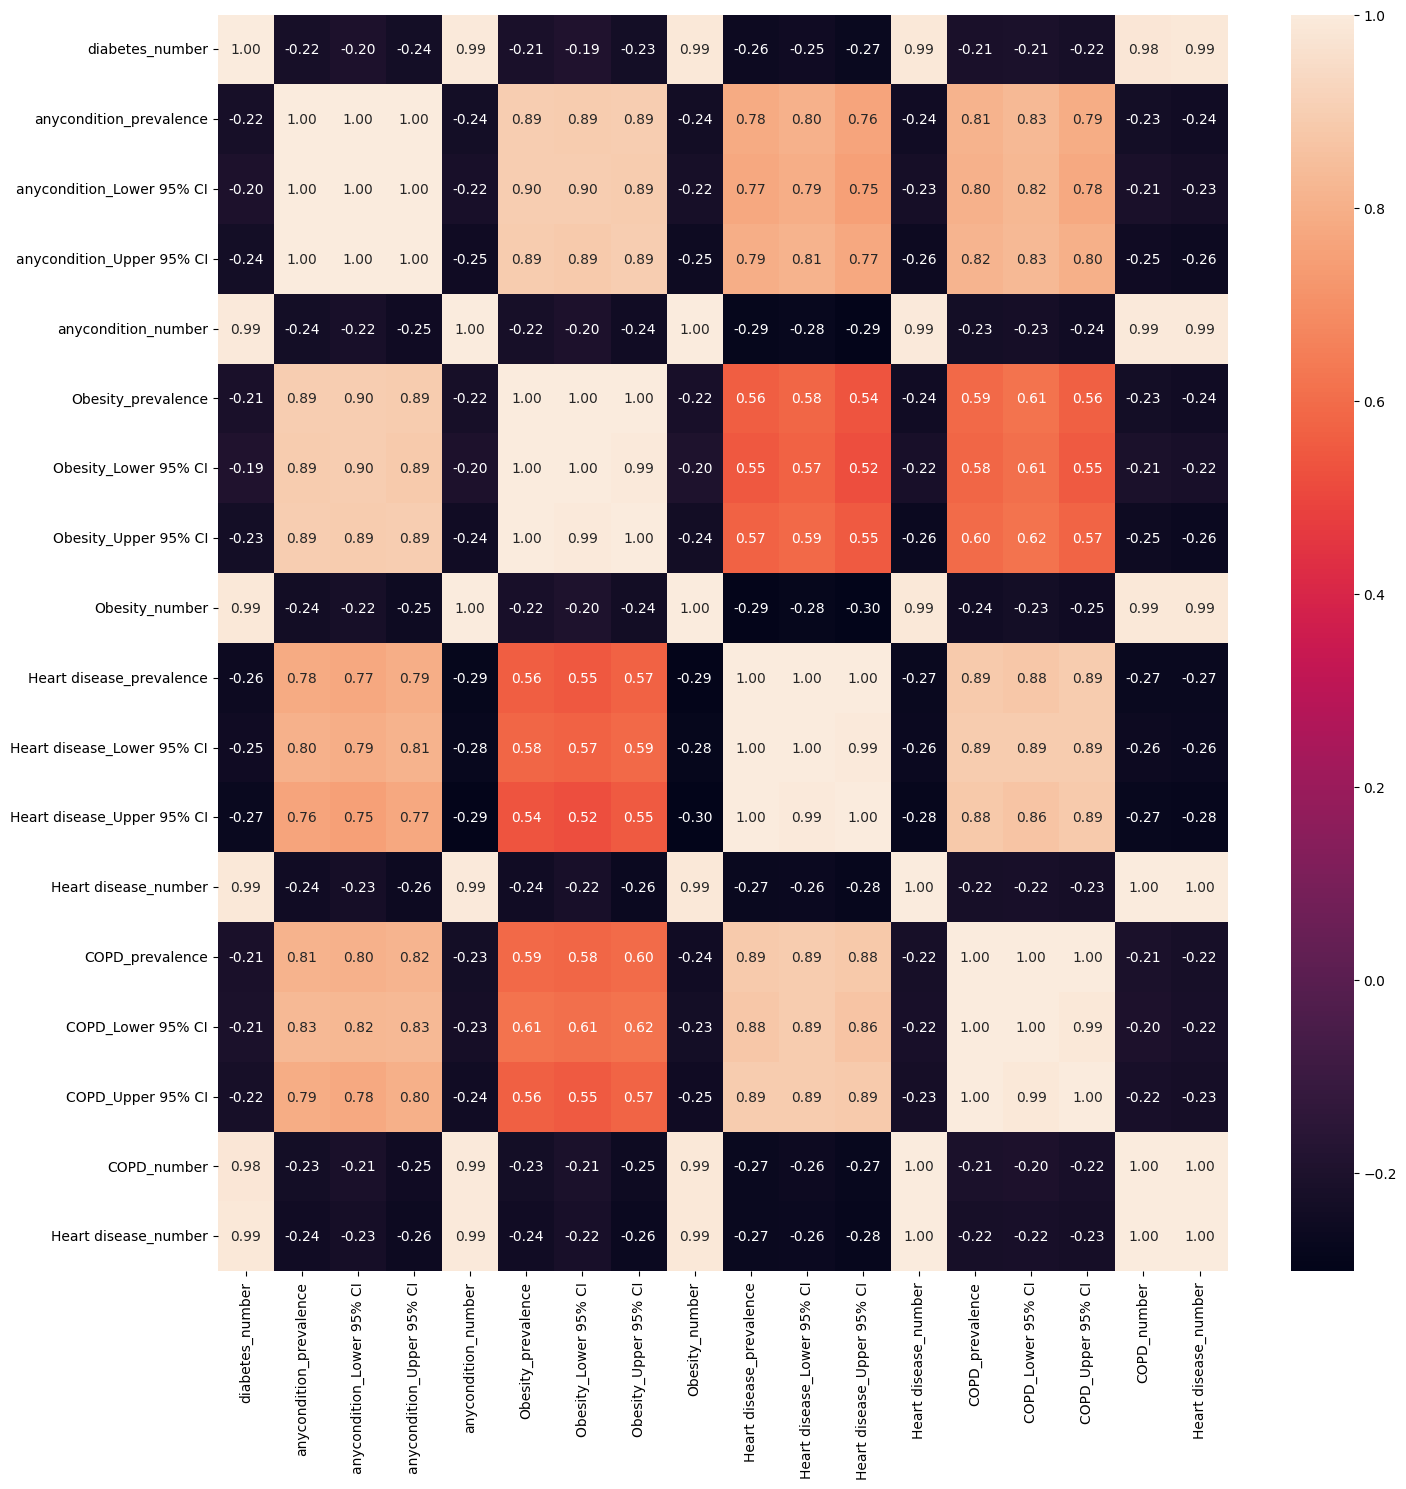

In [8]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["diabetes_number",'anycondition_prevalence','anycondition_Lower 95% CI','anycondition_Upper 95% CI','anycondition_number',	'Obesity_prevalence'	,'Obesity_Lower 95% CI'	,'Obesity_Upper 95% CI',	'Obesity_number'	,'Heart disease_prevalence',	'Heart disease_Lower 95% CI',	'Heart disease_Upper 95% CI',	'Heart disease_number'	,'COPD_prevalence'	,'COPD_Lower 95% CI'	,'COPD_Upper 95% CI'	,'COPD_number', "Heart disease_number"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()	

# Draw Plot
plt.show()

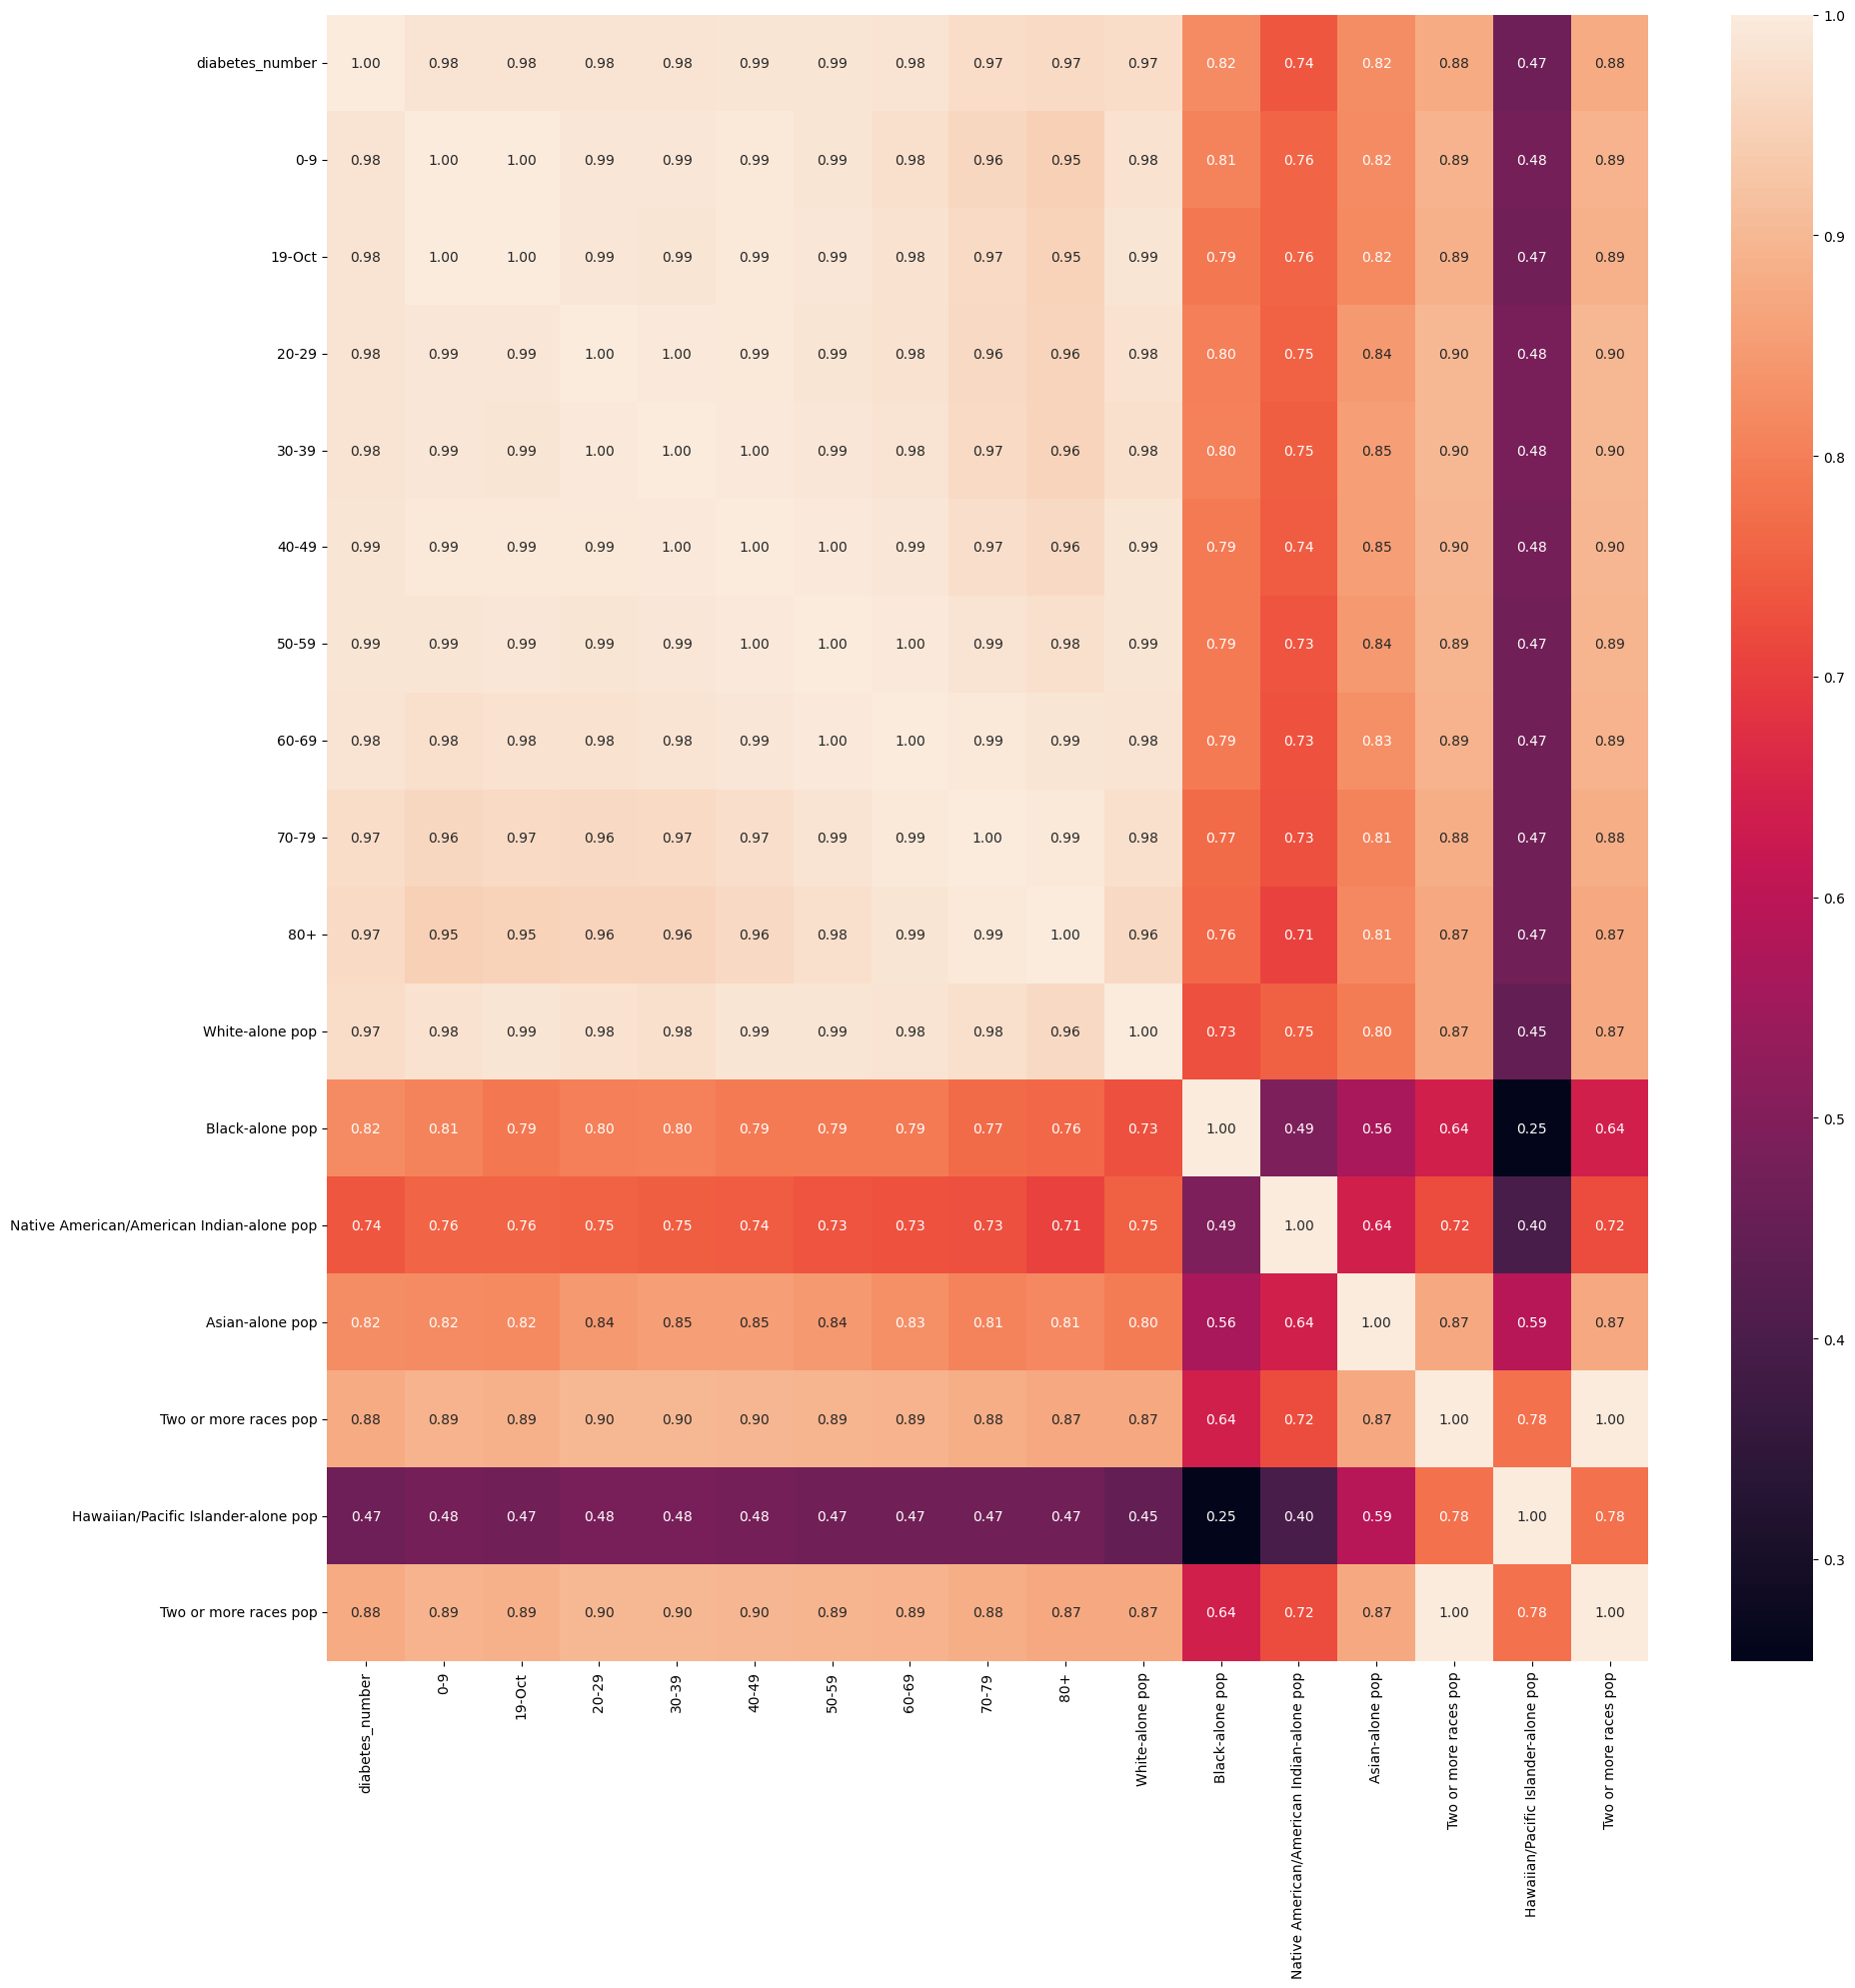

In [9]:
fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(df[["diabetes_number","0-9","19-Oct","20-29","30-39","40-49","50-59","60-69","70-79","80+","White-alone pop","Black-alone pop","Native American/American Indian-alone pop","Asian-alone pop","Two or more races pop","Hawaiian/Pacific Islander-alone pop","Two or more races pop"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()	

# Draw Plot
plt.show()

In [10]:
diabetes_stats = df["diabetes_number"].describe()
diabetes_stats

count      3140.000000
mean       9326.577707
std       29754.601185
min          11.000000
25%        1187.750000
50%        2743.000000
75%        6679.250000
max      952335.000000
Name: diabetes_number, dtype: float64

In [11]:
diabetes_iqr = diabetes_stats["75%"] - diabetes_stats["25%"]
upper_limit = diabetes_stats["75%"] + 1.5 * diabetes_iqr
lower_limit = diabetes_stats["25%"] - 1.5 * diabetes_iqr
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(diabetes_iqr, 2)}")

The upper and lower limits for finding outliers are 14916.5 and -7049.5, with an interquartile range of 5491.5


In [12]:
df = df[df["diabetes_number"] < upper_limit]

In [13]:
scaler = StandardScaler()
norm_features = scaler.fit_transform(df)


df_scal = pd.DataFrame(norm_features, index = df.index, columns = df.columns)
df_scal["diabetes_number"] = df["diabetes_number"]
df_scal.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-1.974800,0.567529,0.583169,0.633975,0.408049,0.606972,0.782566,0.631640,0.331539,0.487793,...,0.562700,-0.151821,-0.153411,-0.183465,5462,-0.732858,-0.695175,-0.803831,0.522147,-1.487883
2,-1.974535,-0.265286,-0.307465,-0.309004,-0.226846,-0.203847,-0.224974,-0.279723,-0.293817,-0.181241,...,0.002055,2.345859,2.389663,2.236219,3870,1.786823,1.807650,1.710921,0.006648,0.807327
3,-1.974402,-0.332545,-0.368085,-0.382394,-0.268879,-0.222199,-0.233020,-0.313030,-0.414567,-0.374246,...,-0.255551,0.288946,0.340021,0.207955,2511,-0.372903,-0.310125,-0.300881,-0.336235,-2.252953
4,-1.974269,0.628228,0.650817,0.620466,0.384131,0.564220,0.758428,0.653300,0.590550,0.814160,...,1.011305,0.068563,0.112283,0.065620,6017,-0.192926,-0.117600,-0.133231,0.734688,-2.252953
5,-1.974136,-0.664966,-0.644390,-0.677970,-0.556252,-0.569842,-0.627275,-0.672467,-0.716102,-0.752105,...,-0.659605,2.676434,2.693314,2.698806,1651,1.786823,1.807650,1.710921,-0.612185,0.807327


In [14]:

X = df_scal.drop(columns=["diabetes_number"])
y = df_scal["diabetes_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,TOT_POP,0-9,19-Oct,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Employed_2018,Unemployed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number
0,1.151584,0.851567,0.884791,1.092879,1.100160,1.427550,1.412836,1.319084,1.533199,1.307110,...,1.045571,1.358771,1.218907,1.432016,1.220249,1.285051,1.277455,1.472308,1.543720,1.279543
1,-0.205644,-0.282646,-0.218275,-0.284971,-0.182732,-0.113797,-0.083925,-0.070847,-0.081554,-0.101392,...,-0.185483,0.055551,-0.180075,-0.063536,-0.195151,-0.074967,-0.065819,-0.060858,-0.012061,-0.175362
2,-0.342413,-0.499868,-0.506391,-0.415311,-0.449815,-0.342864,0.057292,0.133642,-0.097318,-0.305378,...,-0.442342,-0.099931,-0.370830,0.007486,-0.294917,-0.226822,-0.220845,-0.101994,-0.253787,-0.126043
3,-0.466170,-0.570152,-0.593289,-0.502899,-0.542568,-0.419492,-0.260616,-0.193466,-0.243989,-0.437428,...,-0.474212,-0.343048,-0.461761,-0.212629,-0.430203,-0.542413,-0.579242,-0.417048,-0.482280,-0.376160
4,0.057593,0.183646,0.091011,0.025342,-0.009073,0.018616,-0.008654,0.063998,0.457154,0.163179,...,0.175232,-0.169191,0.062379,0.143760,0.028711,-0.065853,0.007284,-0.030853,-0.117926,-0.005094


In [15]:
X_test_sel.head()

,TOT_POP,0-9,19-Oct,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Employed_2018,Unemployed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number
0,-0.568022,-0.545553,-0.520504,-0.549405,-0.534746,-0.538419,-0.619911,-0.627263,-0.581881,-0.505528,...,-0.498338,-0.678041,-0.573915,-0.634912,-0.573123,-0.634860,-0.636620,-0.671608,-0.637108,-0.677944
1,-0.517001,-0.487129,-0.509819,-0.492472,-0.503456,-0.494690,-0.528268,-0.510571,-0.473591,-0.449093,...,-0.467703,-0.348702,-0.509803,-0.506201,-0.520382,-0.533542,-0.568298,-0.573365,-0.537859,-0.569912
2,-0.210903,-0.067181,-0.107989,-0.176737,-0.208658,-0.272366,-0.309280,-0.279040,-0.307044,-0.336064,...,-0.250118,0.064031,-0.198499,-0.276215,-0.251343,-0.209732,-0.227858,-0.192978,-0.108663,-0.117823
3,-0.704411,-0.700837,-0.696519,-0.636576,-0.666387,-0.717218,-0.764994,-0.765812,-0.790236,-0.779815,...,-0.711209,-0.672387,-0.703606,-0.759007,-0.699381,-0.704928,-0.695060,-0.740330,-0.701068,-0.693209
4,1.625654,1.991270,1.273112,2.078041,1.318073,1.449415,1.371221,1.185722,1.378989,0.271398,...,1.492130,1.616022,1.695920,1.425734,1.589402,2.123425,2.320027,1.430204,1.446677,1.893680


In [16]:
X_train_sel["diabetes_number"] = list(y_train)
X_test_sel["diabetes_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [17]:
df = pd.concat([X_train_sel, X_test_sel])
df.head()

,TOT_POP,0-9,19-Oct,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Unemployed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number,diabetes_number
0,1.151584,0.851567,0.884791,1.092879,1.100160,1.427550,1.412836,1.319084,1.533199,1.307110,...,1.358771,1.218907,1.432016,1.220249,1.285051,1.277455,1.472308,1.543720,1.279543,7037
1,-0.205644,-0.282646,-0.218275,-0.284971,-0.182732,-0.113797,-0.083925,-0.070847,-0.081554,-0.101392,...,0.055551,-0.180075,-0.063536,-0.195151,-0.074967,-0.065819,-0.060858,-0.012061,-0.175362,2946
2,-0.342413,-0.499868,-0.506391,-0.415311,-0.449815,-0.342864,0.057292,0.133642,-0.097318,-0.305378,...,-0.099931,-0.370830,0.007486,-0.294917,-0.226822,-0.220845,-0.101994,-0.253787,-0.126043,2695
3,-0.466170,-0.570152,-0.593289,-0.502899,-0.542568,-0.419492,-0.260616,-0.193466,-0.243989,-0.437428,...,-0.343048,-0.461761,-0.212629,-0.430203,-0.542413,-0.579242,-0.417048,-0.482280,-0.376160,1843
4,0.057593,0.183646,0.091011,0.025342,-0.009073,0.018616,-0.008654,0.063998,0.457154,0.163179,...,-0.169191,0.062379,0.143760,0.028711,-0.065853,0.007284,-0.030853,-0.117926,-0.005094,2961


In [18]:
X_test_sel.head()

,TOT_POP,0-9,19-Oct,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Unemployed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number,diabetes_number
0,-0.568022,-0.545553,-0.520504,-0.549405,-0.534746,-0.538419,-0.619911,-0.627263,-0.581881,-0.505528,...,-0.678041,-0.573915,-0.634912,-0.573123,-0.634860,-0.636620,-0.671608,-0.637108,-0.677944,1142
1,-0.517001,-0.487129,-0.509819,-0.492472,-0.503456,-0.494690,-0.528268,-0.510571,-0.473591,-0.449093,...,-0.348702,-0.509803,-0.506201,-0.520382,-0.533542,-0.568298,-0.573365,-0.537859,-0.569912,1394
2,-0.210903,-0.067181,-0.107989,-0.176737,-0.208658,-0.272366,-0.309280,-0.279040,-0.307044,-0.336064,...,0.064031,-0.198499,-0.276215,-0.251343,-0.209732,-0.227858,-0.192978,-0.108663,-0.117823,3171
3,-0.704411,-0.700837,-0.696519,-0.636576,-0.666387,-0.717218,-0.764994,-0.765812,-0.790236,-0.779815,...,-0.672387,-0.703606,-0.759007,-0.699381,-0.704928,-0.695060,-0.740330,-0.701068,-0.693209,1205
4,1.625654,1.991270,1.273112,2.078041,1.318073,1.449415,1.371221,1.185722,1.378989,0.271398,...,1.616022,1.695920,1.425734,1.589402,2.123425,2.320027,1.430204,1.446677,1.893680,10189


In [19]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,TOT_POP,0-9,19-Oct,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Unemployed_2018,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number,diabetes_number
0,1.151584,0.851567,0.884791,1.092879,1.100160,1.427550,1.412836,1.319084,1.533199,1.307110,...,1.358771,1.218907,1.432016,1.220249,1.285051,1.277455,1.472308,1.543720,1.279543,7037
1,-0.205644,-0.282646,-0.218275,-0.284971,-0.182732,-0.113797,-0.083925,-0.070847,-0.081554,-0.101392,...,0.055551,-0.180075,-0.063536,-0.195151,-0.074967,-0.065819,-0.060858,-0.012061,-0.175362,2946
2,-0.342413,-0.499868,-0.506391,-0.415311,-0.449815,-0.342864,0.057292,0.133642,-0.097318,-0.305378,...,-0.099931,-0.370830,0.007486,-0.294917,-0.226822,-0.220845,-0.101994,-0.253787,-0.126043,2695
3,-0.466170,-0.570152,-0.593289,-0.502899,-0.542568,-0.419492,-0.260616,-0.193466,-0.243989,-0.437428,...,-0.343048,-0.461761,-0.212629,-0.430203,-0.542413,-0.579242,-0.417048,-0.482280,-0.376160,1843
4,0.057593,0.183646,0.091011,0.025342,-0.009073,0.018616,-0.008654,0.063998,0.457154,0.163179,...,-0.169191,0.062379,0.143760,0.028711,-0.065853,0.007284,-0.030853,-0.117926,-0.005094,2961


In [20]:
X_train = train_data.drop(["diabetes_number"], axis = 1)
y_train = train_data["diabetes_number"]
X_test = test_data.drop(["diabetes_number"], axis = 1)
y_test = test_data["diabetes_number"]

In [21]:

model = LogisticRegression()
model.fit(X_train, y_train)

/home/leo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): [-2.39537765 -2.34806089 -2.33243121 ... -4.79511315 -6.68021188
 -4.33795841]
Coefficients: [[-0.23427577 -0.2260981  -0.22051846 ... -0.29763952 -0.28487081
  -0.28477526]
 [-0.231194   -0.22274096 -0.21574633 ... -0.2953029  -0.28387973
  -0.28247485]
 [-0.23163461 -0.22475588 -0.22114411 ... -0.29429421 -0.28260162
  -0.2821899 ]
 ...
 [ 0.11004074  0.05599002  0.01114378 ...  0.35109573  0.83191796
   0.29103875]
 [ 0.16974601  0.2431184   0.06876405 ...  0.61409694  0.66730897
   0.58972034]
 [ 0.34854853  0.61500417  0.45456983 ...  0.12300765  0.25729018
   0.39998771]]


In [23]:
y_pred = model.predict(X_test)
y_pred

array([ 1220,  1220,  3953,   562, 14108,  2154,  4812,  1454,  1770,
        8537, 10740,  1454,   393,  1454,  8372,  2946,  1767,  2946,
        1770,   393,   547,  1220,  1770,  1770, 14265,  4613,  4317,
        2946,   547,  2946,  4445,  1454,  2743,  1454,   393,    65,
        1454,  2687,  2154,    65,   562,  2946,   547, 10817,  9137,
        5801,   547,  2987,   393, 12015,    65,   393,  1770,  5554,
         393, 14177,  1770,   393,    65,   547,  4898,  7566,  2687,
        1767,  2946,  1770,   547,   393,  4898,  2946,   393,  2946,
       13700,   547,  1767,  4201,  4812,  1767,   393,   393,  1220,
        4846,  7999,  6153,   393,  2465,   562,  4846,    65,   562,
        2687,   393,  2687,  2725,  2687,   547,    65, 14265,  1767,
        7079,    65,  1770,  7922,  3379,  1770,  2765,  3937,   547,
       11540,  1770,  3937,   562,  1454,  2946,  4613,  1454,  1454,
        1454,   393,   393,  2687,  7217,    65,  1454,  3937,  4898,
        2687,  2687,

In [24]:

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 744110.887477314
R2 Score: 0.9293388710433701


In [31]:
# Busqueda de hiper-parámetros
lasso_m = {'alpha': np.logspace(-5, 3, 100),}

lasso_grid = GridSearchCV(Lasso(max_iter=1500),
        lasso_m,
        n_jobs = 50,
        scoring= 'neg_root_mean_squared_error',
        cv= 5,
        
        
       )

lasso_grid.fit(X_train, y_train)


/home/leo/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+07, tolerance: 1.772e+06
  model = cd_fast.enet_coordinate_descent(
/home/leo/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+07, tolerance: 1.772e+06
  model = cd_fast.enet_coordinate_descent(
/home/leo/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.920e+07,

GridSearchCV(cv=5, estimator=Lasso(max_iter=1500), n_jobs=50,
             param_grid={'alpha': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05, 7.74263683e-05,
       9.32603347e-05, 1.12332403e-04, 1.35304777e-04, 1.62975083e-04,
       1.96304065e-04, 2.3644894...
       1.38488637e+01, 1.66810054e+01, 2.00923300e+01, 2.42012826e+01,
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03])},
             scoring='neg_root_mean_squared_error')

In [32]:
# Mejores parámetros
lasso_grid.best_params_

{'alpha': 0.5857020818056673}

In [33]:
# Mejor modelo
best_lasso_grid = Lasso(alpha = 0.5857020818056673)
best_lasso_grid.fit(X_train, y_train)

/home/leo/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.393e+07, tolerance: 2.253e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5857020818056673)

In [34]:
## Presición lasso
y_pred_lasso = best_lasso_grid.predict(X_test)
y_pred_lasso

array([1.13513614e+03, 1.45146182e+03, 3.06346075e+03, 1.18902097e+03,
       1.02296771e+04, 1.92520428e+03, 4.04642273e+03, 1.47520569e+03,
       2.45099996e+03, 9.87079486e+03, 9.31883105e+03, 1.61354737e+03,
       3.89847377e+02, 1.40631306e+03, 8.31258351e+03, 2.99760435e+03,
       1.92039029e+03, 3.43345079e+03, 1.81103768e+03, 4.82686202e+02,
       5.42143136e+02, 1.19838246e+03, 2.65004684e+03, 2.72163935e+03,
       1.47091202e+04, 6.08517794e+03, 2.92021804e+03, 4.07444076e+03,
       7.49389302e+02, 2.84193543e+03, 5.98277043e+03, 1.76286412e+03,
       3.60370745e+03, 1.58400135e+03, 5.12586593e+02, 1.45925243e+02,
       1.50655183e+03, 2.95016573e+03, 2.72755655e+03, 1.04041684e+02,
       1.07350806e+03, 3.76382412e+03, 9.14764054e+02, 9.79511908e+03,
       7.43235102e+03, 7.21363932e+03, 7.29712962e+02, 3.83991897e+03,
       2.22638073e+02, 1.00700499e+04, 6.39783121e+01, 1.94485352e+02,
       2.19862764e+03, 5.25900177e+03, 4.49567404e+02, 1.25186470e+04,
      

In [35]:
### Raiz cuadrada del error
print(f'MSE: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred_lasso))}')
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_lasso)}")

MSE: 48447.709799477845
RMSE:220.1084046543381
Coeficiente de determinación: 0.9953993820982782


In [37]:
#Guardo modelo optimizado
import pickle
pickle.dump(best_lasso_grid, open("../models/optimizado_lasso.sav", "wb"))

